In [3]:
!pip install numpy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import math
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/NetflixOriginals.csv', encoding='latin1')
data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [6]:
data["Premiere_Date"] = pd.to_datetime(data.Premiere)
data

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Date
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08


## In what language are feature films produced? Visualize.

In [11]:
runtime_greater_100 = data[data.Runtime > 100]
runtime_greater_100.head(3)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Date
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,2019-11-01
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish,2020-12-04
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,2020-06-05


In [15]:
runtime_long = runtime_greater_100.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)
runtime_long

,Runtime
Language,
English/Akan,136.000000
Khmer/English/French,136.000000
Japanese,125.750000
Korean,123.200000
Marathi,121.666667
Hindi,121.115385
English/Korean,121.000000
English/Japanese,120.000000
Thai,117.000000


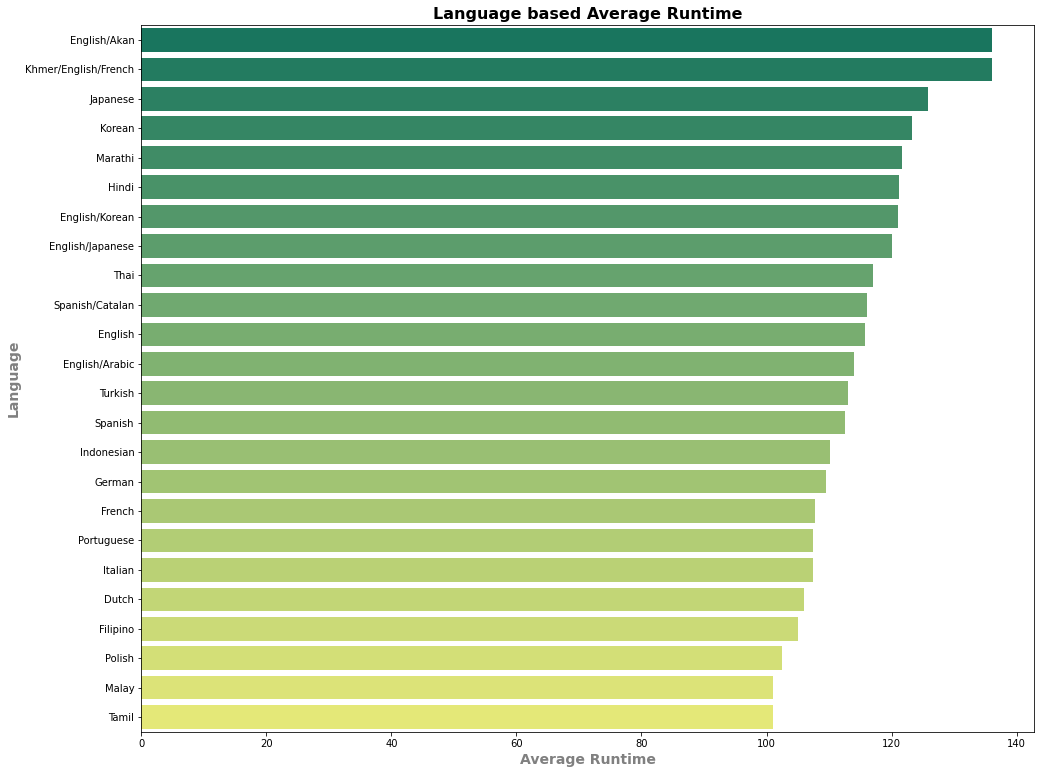

In [18]:
plt.figure(figsize=(16,13))
sns.barplot(x = "Runtime", y ="Language", data = runtime_long.reset_index(), palette = "summer")
plt.title("Language based Average Runtime", weight="bold", color="black", fontsize=16)
plt.xlabel("Average Runtime", weight="bold", color="gray", fontsize=14)
plt.ylabel("Language", weight="bold", color="gray", fontsize=14)
plt.show()

## Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.

In [ ]:
genre_premiere=data.loc[(data["Genre"] == "Documentary") & (data["Premiere_Date"] > "2019-01-01") & (data["Premiere_Date"] < "2020-06-30")].sort_values(by="IMDB Score", ascending=False)
print(genre_premiere)

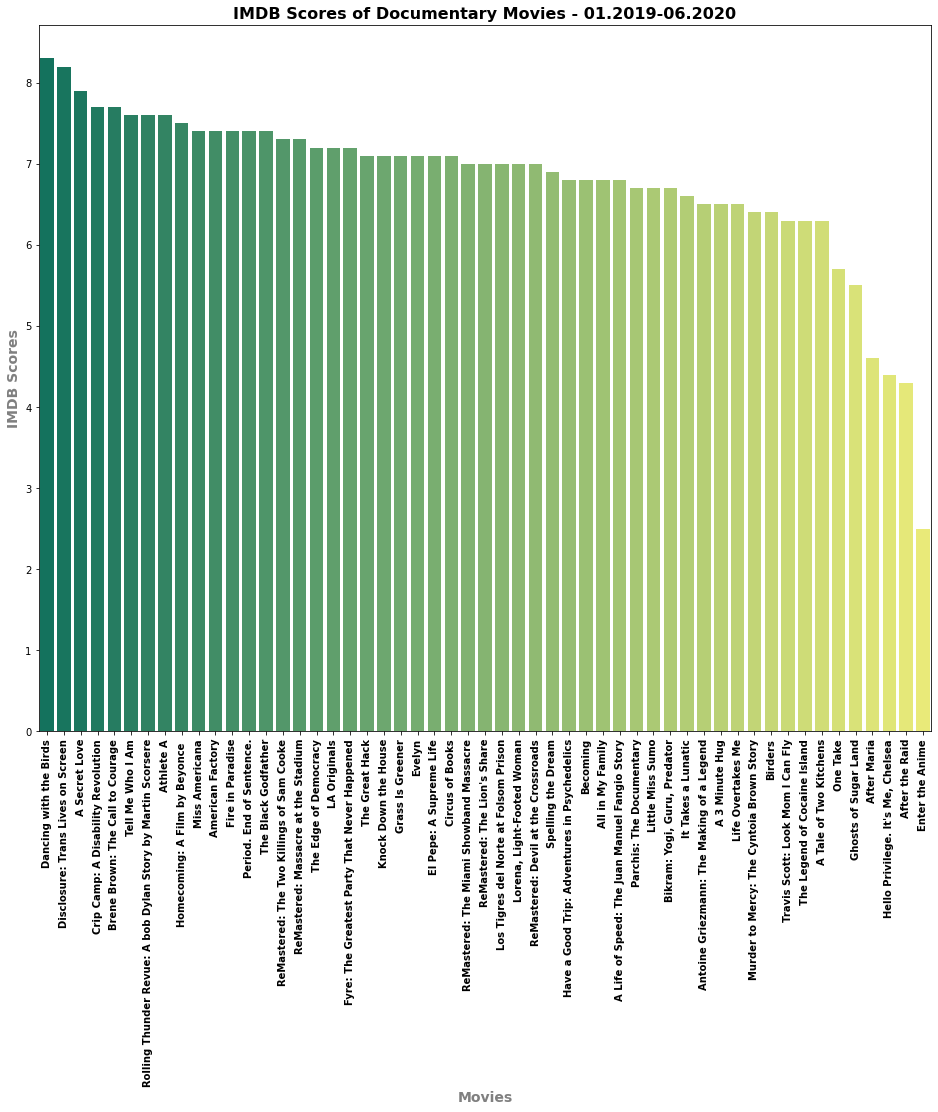

In [22]:
plt.figure(figsize=(16,13))
sns.barplot(x = "Title", y ="IMDB Score", data = genre_premiere.reset_index(), palette = "summer")
plt.title("IMDB Scores of Documentary Movies - 01.2019-06.2020", weight="bold", color="black", fontsize=16)
plt.xlabel("Movies", weight="bold", color="gray", fontsize=14)
plt.xticks(rotation = 90, fontsize=10, weight="bold")
plt.ylabel("IMDB Scores", weight="bold", color="gray", fontsize=14)
plt.show()

## Which genre has the highest IMDB rating among English movies?

In [24]:
english_movies = data[data["Language"] == "English"].sort_values(by="IMDB Score", ascending=False)
english_movies

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23
...,...,...,...,...,...,...,...
14,Mercy,Thriller,"November 22, 2016",90,4.2,English,2016-11-22
10,Searching for Sheela,Documentary,"April 22, 2021",58,4.1,English,2021-04-22
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English,2018-03-23
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,2020-06-05


## What is the average 'runtime' of movies shot in 'Hindi'?

In [40]:
hindi_movies = data[data["Language"] == "Hindi"]
hindi_movies["Runtime"].mean()

115.78787878787878

In [41]:
hindi_movies=data[data['Language'].str.contains("Hindi")]
hindi_movies['Runtime'].mean()

111.02857142857142

## How many categories does the 'Genre' Column have and what are those categories? Visualize.

In [43]:
data["Genre"].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

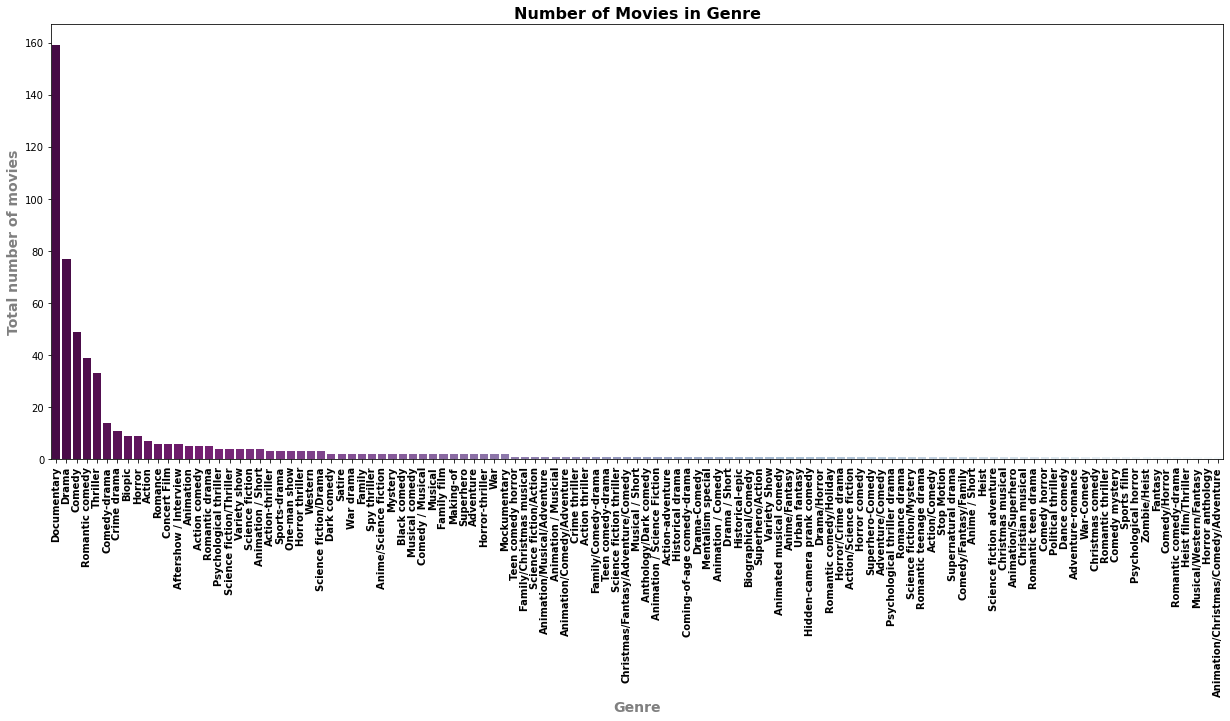

In [45]:
plt.figure(figsize=(21,8))

sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index, palette="BuPu_r")
plt.title("Number of Movies in Genre", weight="bold", color="black", fontsize=16)
plt.xlabel("Genre", weight="bold", color="gray", fontsize=14)
plt.ylabel("Total number of movies", weight="bold", color="gray", fontsize=14)
plt.xticks(rotation = 90, fontsize=10, weight="bold")
plt.show()

## Find the 3 most used languages in the movies in the dataset.

In [52]:
data["Language"].value_counts(sort=True)[0:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

## What are the top 10 movies with the highest IMDB rating?

In [57]:
data.sort_values(by="IMDB Score", ascending=False).reset_index().head(10)

,index,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Date
0,583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04
1,582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08
2,581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
3,580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
4,579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
5,578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20
6,577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23
7,576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,2017-11-24
8,573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,2019-11-15
9,571,13th,Documentary,"October 7, 2016",100,8.2,English,2016-10-07


## What is the correlation between IMDB score and 'Runtime'? Examine and visualize.

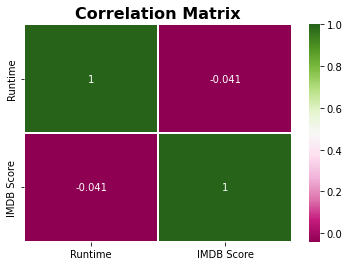

In [62]:
sns.heatmap(data[["Runtime", "IMDB Score"]].corr(), annot = True, linewidths=1, cmap = "PiYG")
plt.title("Correlation Matrix", weight="bold", color="black", fontsize=16)
plt.show(block=True)

In [64]:
# there is no linear relationship between runtime and IMDB score, or there is a very weak relationship

## Which are the top 10 'Genre' with the highest IMDB Score? visualize

In [74]:
data.groupby("Genre").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=False).head(10)

,IMDB Score
Genre,
Animation/Christmas/Comedy/Adventure,8.200000
Musical / Short,7.700000
Concert Film,7.633333
Anthology/Dark comedy,7.600000
Animation / Science Fiction,7.500000
Making-of,7.450000
Action-adventure,7.300000
Historical drama,7.200000
Coming-of-age comedy-drama,7.200000


In [76]:
top_genre_score = data.groupby("Genre")["IMDB Score"].max().sort_values(ascending = False).reset_index().head(10)
top_genre_score

,Genre,IMDB Score
0,Documentary,9.0
1,One-man show,8.5
2,Concert Film,8.4
3,Animation/Christmas/Comedy/Adventure,8.2
4,Drama,7.9
5,Animation / Short,7.8
6,Crime drama,7.8
7,Musical / Short,7.7
8,Making-of,7.7
9,War drama,7.7


<Figure size 2160x1440 with 0 Axes>

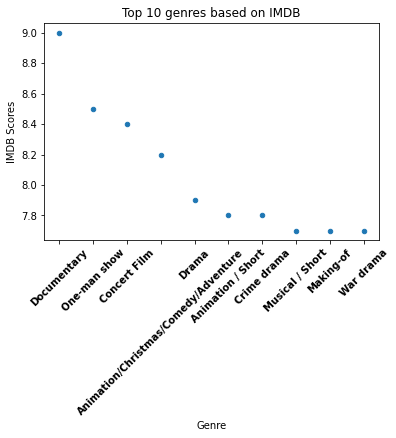

In [79]:
plt.figure(figsize=(30,20))

top_genre_score.plot(kind="scatter", x='Genre', y='IMDB Score')
plt.title("Top 10 genres based on IMDB")
plt.xlabel("Genre")
plt.ylabel("IMDB Scores")
plt.xticks(rotation = 45, fontsize=10, weight="bold")
plt.show()

## What are the top 10 movies with the highest 'runtime'? Visualize it.

In [84]:
runtime_top = data.sort_values(by="Runtime", ascending=False).head(10)
runtime_top

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Date
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English,2019-11-27
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English,2020-06-12
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
247,Citation,Drama,"November 6, 2020",151,6.2,English,2020-11-06
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese,2019-10-11
509,Raat Akeli Hai,Thriller,"July 31, 2020",149,7.3,Hindi,2020-07-31
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,2020-06-05
543,Ludo,Anthology/Dark comedy,"November 12, 2020",149,7.6,Hindi,2020-11-12
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English,2021-05-21
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,2019-11-01


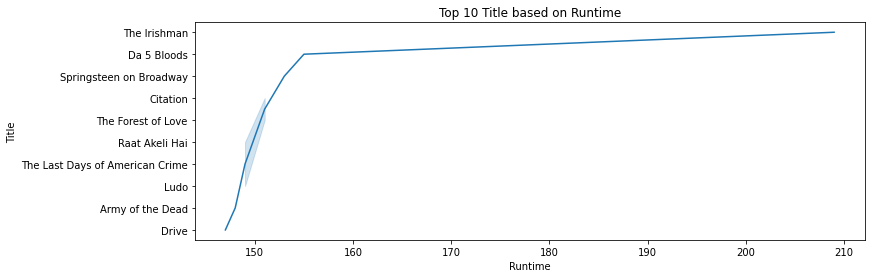

In [85]:
plt.figure(figsize=(12,4))

sns.lineplot(x='Runtime', y='Title', data=runtime_top)
plt.title("Top 10 Title based on Runtime")
plt.xlabel("Runtime")
plt.ylabel("Title")
plt.show()

## In which year was the most movies released? Visualize it.

In [87]:
year=data["Premiere_Date"].dt.year.value_counts().reset_index()
year

,index,Premiere_Date
0,2020,183
1,2019,125
2,2018,99
3,2021,71
4,2017,66
5,2016,30
6,2015,9
7,2014,1


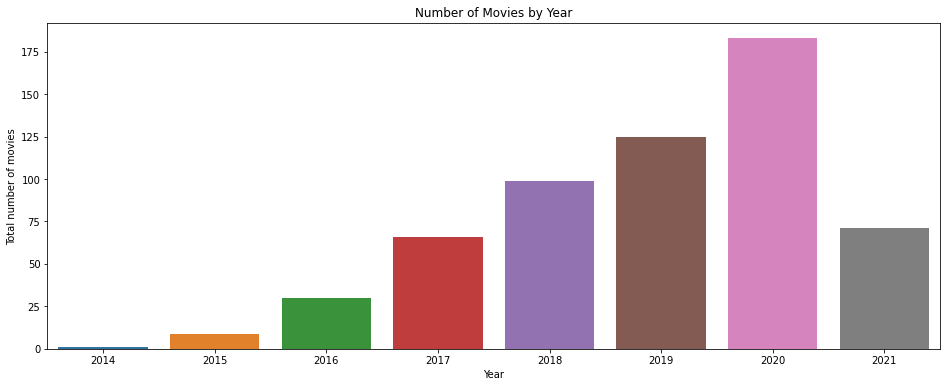

In [88]:
plt.figure(figsize=(16,6))

sns.barplot(x="index", y= "Premiere_Date", data=year)
plt.title("Number of Movies by Year")
plt.xlabel("Year")
plt.ylabel("Total number of movies")
plt.show()

## Which language movies have the lowest average IMDB rating? visualize

In [90]:
IMDB_Language=data.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=True).reset_index()
IMDB_Language.head(10)

,Language,IMDB Score
0,Malay,4.200000
1,English/Japanese,4.400000
2,Norwegian,5.100000
3,Filipino,5.100000
4,Polish,5.166667
5,Thai,5.450000
6,Swedish,5.500000
7,Italian,5.542857
8,Spanish/Basque,5.600000
9,German,5.640000


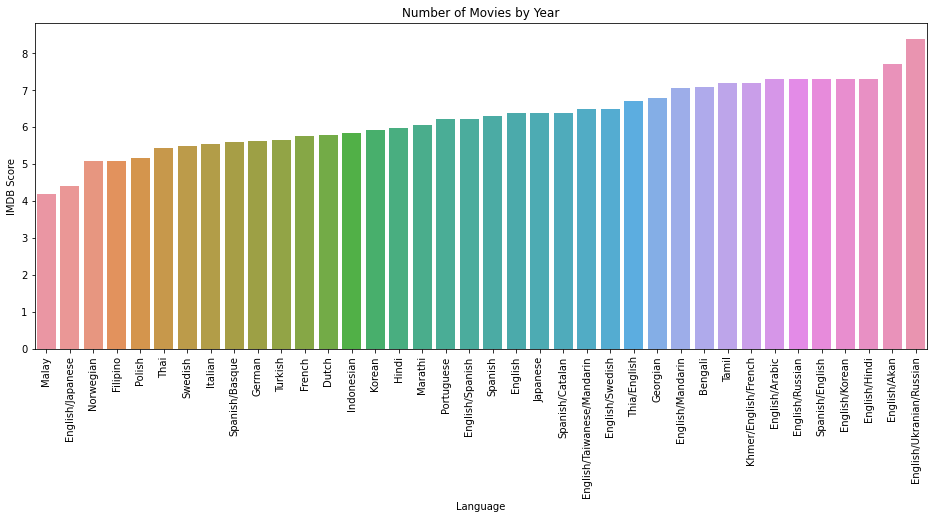

In [95]:
plt.figure(figsize=(16,6))

sns.barplot(x="Language", y= "IMDB Score", data=IMDB_Language)
plt.title("Number of Movies by Year")
plt.xticks(rotation = 90)
plt.show()

##  Which year has the greatest total runtime?

In [101]:
year_data=data["Premiere_Date"].dt.year
year_runtime=data.groupby(year_data).agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False).reset_index()
year_runtime.head(10)

,Premiere_Date,Runtime
0,2020,17384
1,2019,10856
2,2018,9405
3,2021,7214
4,2017,6129
5,2016,2766
6,2015,814
7,2014,81


## What is the "Genre" where each language is used the most?

In [102]:
x=data.groupby(["Language","Genre"]).agg({'Language': 'count' })
x.rename(columns = {'Language':'Count' }, inplace = True )
x.sort_values("Count", ascending=False)

Count
Language Genre                           
English  Documentary                  120
         Drama                         35
         Comedy                        30
         Romantic comedy               27
         Thriller                      14
...                                   ...
         Satire                         1
         Science fiction adventure      1
         Science fiction/Action         1
         Science fiction/Mystery        1
Turkish  Romance                        1

[204 rows x 1 columns]

## Is there any outlier data in the data set?

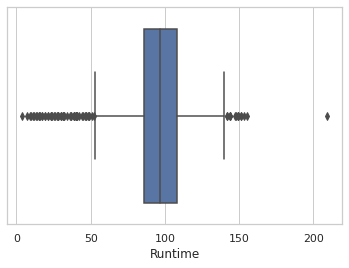

In [107]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["Runtime"])

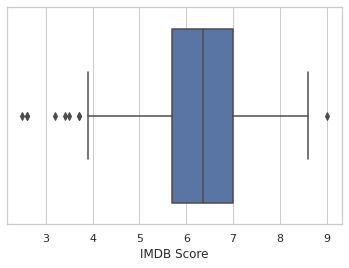

In [108]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["IMDB Score"])

In [109]:
def outlier_detect(data):
    columns= ["Runtime", "IMDB Score"]
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3- Q1
        
        min_limit = Q1 - IQR*1.5
        max_limit = Q3 + IQR*1.5
        
        total_outlier = (data[col] < min_limit).sum() + (data[col] > max_limit).sum()
        
        if total_outlier > 0:
            print(f"{col} : Outlier value found in a variable.")
            sns.boxplot(data[col], palette="YlGnBu")
            plt.title("{} Boxplot".format(col), weight="bold", color="black", fontsize=16)
            plt.xlabel("{} ".format(col), weight="bold", color="gray", fontsize=14)
            plt.xticks(fontsize=10, weight="bold")
            plt.show()
            print(f"{col} : The total outlier in a variable {total_outlier}.")
            print("*"*50)
        else:
            print(f"{col} : Outlier value doesn't found in a variable.")
    return data

Runtime : Outlier value found in a variable.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


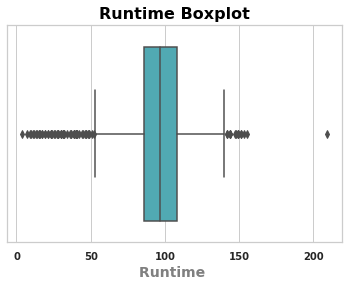

Runtime : The total outlier in a variable 75.
**************************************************
IMDB Score : Outlier value found in a variable.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


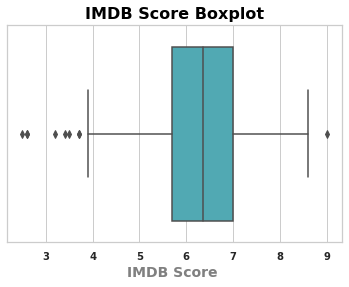

IMDB Score : The total outlier in a variable 9.
**************************************************


,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Date
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08


In [110]:
outlier_detect(data)